In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# setup: has to be in a separate cell for some reason
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
lam = 0.8
def new_degree():
    return 1 + np.random.poisson(lam)

N = 200 # size of graph
# an edge from i to j if j is in edges[i]
edges = [[] for _ in range(N)]
active = set([0])
visited = set([])
unvisited = set([k for k in range(N)])
unvisited.remove(0)
degrees = [new_degree() for _ in range(N)]
outdegrees = degrees.copy()
n_active = np.repeat(-1, 1000)
generation = [np.inf for _ in range(N)]
generation[0] = 0

is_branching_process = True
num_ghosts = 0 # number of additional nodes
num_ghosts_so_far = np.repeat(-1, 1000)

t = 0
while len(active) > 0:
    x = active.pop()
    #print("step", t, "vertex", x)
    while outdegrees[x] > 0:
        outdegrees[x] -= 1
        M = np.sum(outdegrees[:N])
        if x < N:
            # real
            y = np.random.choice(N, size=1, p=outdegrees[:N]/M)[0]
        else:
            # ghost
            y = N + num_ghosts
            num_ghosts += 1
            outdegrees.append(new_degree())
            generation.append(np.inf)
        outdegrees[y] -= 1
        generation[y] = min(generation[y], 1 + generation[x])
        assert(outdegrees[y] >= 0)
        if y != x and y not in active:
            #print("new node")
            if y < N:
                unvisited.remove(y)
            active.update([y])
        elif is_branching_process:
            outdegrees.append(new_degree())
            outdegrees.append(new_degree())
            active.update([N+num_ghosts, N+num_ghosts+1])
            generation.append(1 + generation[x])
            generation.append(1 + generation[x])
            num_ghosts += 2
        #print("connecting to", y)
        #edges[x].append(y)
        #edges[y].append(x)
    assert(outdegrees[x] == 0)
    visited.update([x])
    n_active[t] = len(active)
    num_ghosts_so_far[t] = num_ghosts
    t += 1
    assert(len(visited) == t)
    #print("state:")
    #print("edges:", len(edges), edges)
    #print("visited:", visited)
    #print("active:", active)
    #print("univisited:", unvisited)
    #print("outdegrees", outdegrees)

print("component is of size", 1+t)
print("there are", num_ghosts, "ghosts")

component is of size 103
there are 11 ghosts


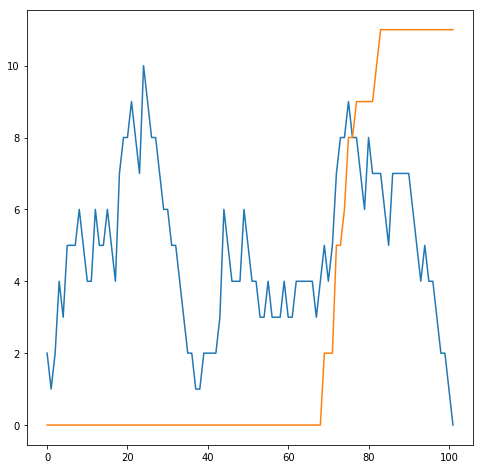

In [4]:
fig, ax = plt.subplots()
ax.plot(n_active[:t])
ax.plot(num_ghosts_so_far[:t])

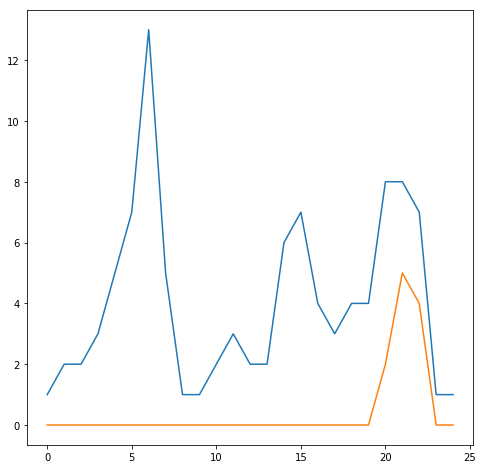

In [5]:
generation = np.array(generation)
fig, ax = plt.subplots()
ax.plot([sum(generation == s) for s in set(generation[generation < np.inf])])
ax.plot([sum(generation[N:] == s) for s in set(generation[generation < np.inf])])

In [6]:
generation[N:]

array([20., 20., 21., 21., 21., 22., 21., 21., 22., 22., 22.])